In [9]:
'''Modify raw data by adding activity labels to raw data files (not include labels with transitioning activities ex. sit to stand)'''

# open and read file by lines 
with open('../NHANES/UCI dataset/acc_exp61_user30.txt', 'r') as file:
    lines = [line.rstrip('\n') for line in file.readlines()]
    
# Loop through each line and add labels (not include labels with transitioning activities ex. sit to stand)
line_ranges = {
    range(573, 1622): 'Standing',
    range(1838, 2772): 'Sitting',
    range(2900, 4197): 'Standing',
    range(4446, 5657): 'Laying',
    range(5896, 7165): 'Sitting',
    range(7457, 8524): 'Laying',
    range(9675, 10779): 'Walking',
    range(11105, 12197): 'Walking',
    range(12955, 13637): 'Downstairs',
    range(13841, 14574): 'Upstairs',
    range(14750, 15427): 'Downstairs',
    range(15587, 16319): 'Upstairs',
    range(16545, 17250): 'Downstairs',
    range(17393, 18097): 'Upstairs'

}
   

for line_range, new_word in line_ranges.items():
    for line_number in line_range:
        line = lines[line_number].rstrip('\n')
        last_word = line.split()[-1]
        new_line = line + ' ' + new_word
        lines[line_number] = new_line

with open('../NHANES/UCI dataset/acc_exp61_user30.txt', 'w') as file:
    for line in lines:
        file.write(line + '\n')

In [10]:
#combine all files and drop rows that don't have labels
#down sample to 20 Hz

import glob

# Get a list of all text files in a directory
file_paths = glob.glob('../NHANES/UCI dataset/*')

# Initialize an empty list to store the contents of each file
contents = []

# Iterate over each file
for file_path in file_paths:
     with open(file_path, 'r') as file:
        file_contents = file.read()
        contents.append(file_contents)
        

# Combine the contents of all files into a single string
combined_contents = '\n'.join(contents)

# Write the combined contents to a new file
with open('raw_combined.txt', 'w') as file:
    file.write(combined_contents)

In [11]:
raw_path = '../NHANES/raw_combined.txt'
# Open the file in read mode and a new file in write mode
with open(f'{raw_path}', 'r') as f, open(f'{raw_path}_cleaned.txt', 'w') as f_out:
# Read the file line by line
    for line in f:
        # Remove trailing whitespaces and write the cleaned line to the new file
        f_out.write(line.rstrip() + '\n')

        

In [12]:
# create functions to read data and show information
import pandas as pd
def read_data(file_path):

    column_names = ['x-axis',
                    'y-axis',
                    'z-axis',
                    'activity']
    # import data set: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
    df = pd.read_csv(file_path,
                     delim_whitespace = True,
                     header= None,                 # column names are passed explicitly so header = none
                     names=column_names,          #List of column names to use
                     lineterminator = '\n',       #lineterminator: break file into lines
                     on_bad_lines= 'warn')        
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df.dropna(axis=0,                             # determine rows or column to removed (0 = rows, 1 = column)
              how='any',                          # Determine if row or column is removed from DataFrame, when we have at least one NA or all NA. (Any = if one NA value present, drop that row or column)
              inplace=True)                       # Whether to modify the DataFrame rather than creating a new one (true = modified)

    return df

def show_basic_dataframe_info(dataframe):
    print(dataframe.shape)
    
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))     # .shape[1] = output is no. of column. 
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))      # .shape[0] = output is no. of rows
                                                                                

# Load data set containing all the data from csv
df = read_data('../NHANES/raw_combined_cleaned.txt') 

# show data
show_basic_dataframe_info(df)
df.head(20) 

(747466, 4)
Number of columns in the dataframe: 4
Number of rows in the dataframe: 747466



,x-axis,y-axis,z-axis,activity
250,0.986111,-0.337500,0.015278,Standing
251,0.990278,-0.337500,0.022222,Standing
252,0.986111,-0.340278,0.012500,Standing
253,0.987500,-0.333333,0.011111,Standing
254,0.988889,-0.327778,0.012500,Standing
255,0.986111,-0.333333,0.009722,Standing
256,0.986111,-0.327778,0.018056,Standing
257,0.986111,-0.333333,0.015278,Standing
258,0.986111,-0.333333,0.016667,Standing
259,0.987500,-0.333333,0.012500,Standing


In [16]:
#doen sampling data 50 Hz to 20 Hz
import pandas as pd

# Create a mask to select first and fourth rows in every 5 rows
mask = ((df.index + 1) % 5 == 1) | ((df.index + 1) % 5 == 4)

# Select the rows based on the mask
selected_df = df[mask]
show_basic_dataframe_info(selected_df)
selected_df.head()

(299002, 4)
Number of columns in the dataframe: 4
Number of rows in the dataframe: 299002



,x-axis,y-axis,z-axis,activity
250,0.986111,-0.337500,0.015278,Standing
253,0.987500,-0.333333,0.011111,Standing
255,0.986111,-0.333333,0.009722,Standing
258,0.986111,-0.333333,0.016667,Standing
260,0.987500,-0.336111,0.012500,Standing


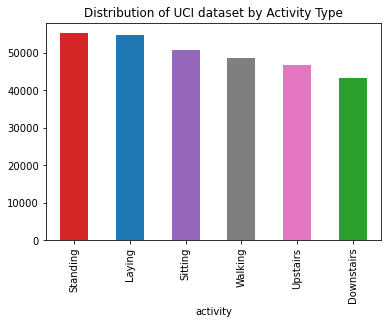

In [19]:
from matplotlib import pyplot as plt
# Show how many training examples exist for each of the six activities
bar_colors = ['tab:red', 'tab:blue', 'tab:purple', 'tab:gray', 'tab:pink', 'tab:green' ] # change bar color
selected_df['activity'].value_counts().plot(kind='bar',
                                   title='Distribution of UCI dataset by Activity Type',
                                   color = bar_colors)

plt.show()

In [18]:
#save to text file (column as x,y,z,activity)
selected_df.to_csv('UCI_processed_data (20 Hz).txt', index=False, sep=',', header=False)